In [57]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
from pyinpaint import Inpaint

(346, 688, 3)


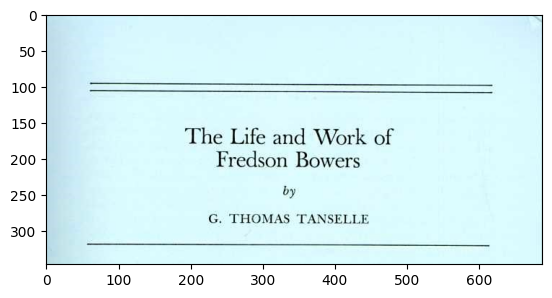

In [58]:
image_path = "test3.jpg"
image = cv2.imread(image_path)
img_h, img_w, img_c = image.shape

mask_path = "inpaint_mask.jpg"
mask = np.zeros([img_h, img_w, img_c],dtype=np.uint8)
mask.fill(255)

print(image.shape)
plt.imshow(image)

In [59]:
ocr_res = pytesseract.image_to_data(image, output_type=pytesseract.Output.DICT)
for i in ocr_res:
    print(i, ocr_res[i])

level [1, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 5, 5, 5, 5, 4, 5, 5, 2, 3, 4, 5, 4, 5, 5, 5, 2, 3, 4, 5]
page_num [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
block_num [0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5]
par_num [0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1]
line_num [0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 1, 1, 2, 2, 2, 2, 0, 0, 1, 1]
word_num [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 2, 3, 4, 5, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 3, 0, 0, 0, 1]
left [0, 61, 61, 61, 61, 61, 61, 61, 61, 193, 193, 193, 193, 256, 315, 371, 456, 236, 236, 347, 226, 226, 329, 329, 226, 226, 254, 348, 57, 57, 57, 57]
top [0, 95, 95, 95, 95, 105, 105, 105, 105, 157, 157, 157, 157, 157, 158, 158, 158, 189, 189, 190, 238, 238, 238, 238, 277, 277, 277, 277, 317, 317, 317, 317]
width [688, 558, 558, 558, 558, 558, 558, 558, 558, 290,

True

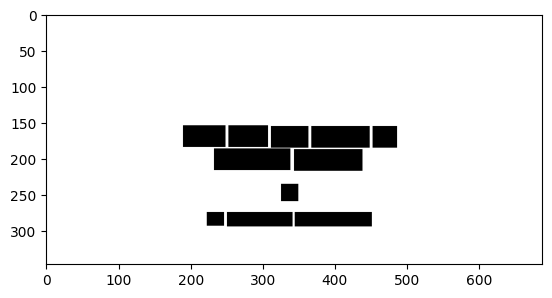

In [60]:
for i in range(len(ocr_res['text'])):
    x = ocr_res['left'][i]
    y = ocr_res['top'][i]
    w = ocr_res['width'][i]
    h = ocr_res['height'][i]

    conf = int(ocr_res['conf'][i])
    text = ocr_res['text'][i]
    text = text.strip()

    if conf > 50:
        if len(text) < 1:
            continue
        cv2.rectangle(mask, (x-3,y-3), (x+w+3,y+h+3), (0,0,0), -1)
plt.imshow(mask)
cv2.imwrite(mask_path, mask)

In [61]:
inpaint = Inpaint(image_path, mask_path)
inpainted_img = inpaint()

# of pixels to be inpainted are 18434: 100%|██████████|18434/18434


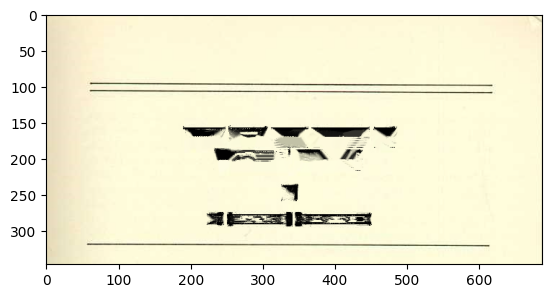

In [62]:
plt.imshow(inpainted_img)